In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
cases = pd.read_csv("covid_19_india.csv")
cases.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [33]:
cases.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [35]:
# Convert Date column to date
cases.Date = pd.to_datetime(cases.Date, format='%d/%m/%y')

In [39]:
casesByDay = cases.groupby(['Date']).sum()[['Cured','Deaths','Confirmed']].sort_index().reset_index()
casesByDay.head()

,Date,Cured,Deaths,Confirmed
0,2020-01-30,0,0,1
1,2020-01-31,0,0,1
2,2020-02-01,0,0,2
3,2020-02-02,0,0,3
4,2020-02-03,0,0,3


Text(0.5, 1.0, 'Covid-2019 Status for India as of 04/06')

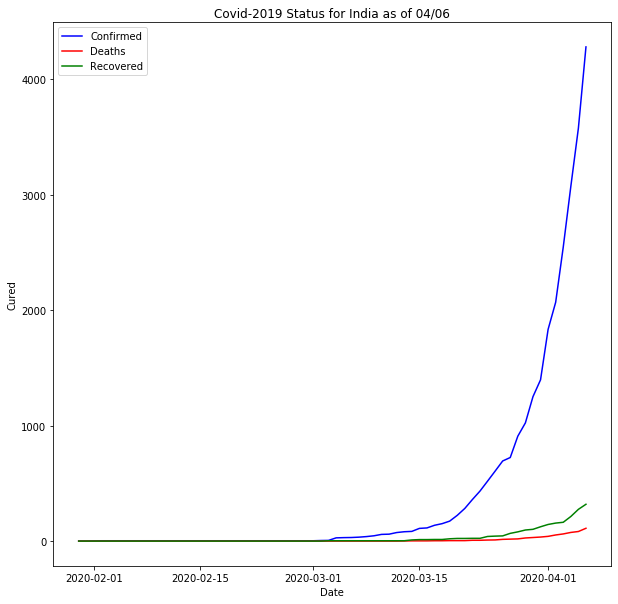

In [63]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Date', y='Confirmed', data=casesByDay, label='Confirmed', color='blue')
ax = sns.lineplot(x='Date', y='Deaths', data=casesByDay, label='Deaths', color='red')
ax = sns.lineplot(x='Date', y='Cured', data=casesByDay, label='Recovered', color='green')
ax.legend()
plt.title('Covid-2019 Status for India as of 04/06')

In [73]:
casesByState = cases.groupby(['State/UnionTerritory']).max()[['Cured','Deaths','Confirmed']].sort_values(by='Confirmed', ascending=False).reset_index()
casesByState.head()

,State/UnionTerritory,Cured,Deaths,Confirmed
0,Maharashtra,56,45,748
1,Tamil Nadu,8,5,571
2,Delhi,19,7,523
3,Telengana,34,7,321
4,Kerala,55,2,314


Text(0.5, 1.0, 'Top 20 states with confirmed cases for Covid-19')

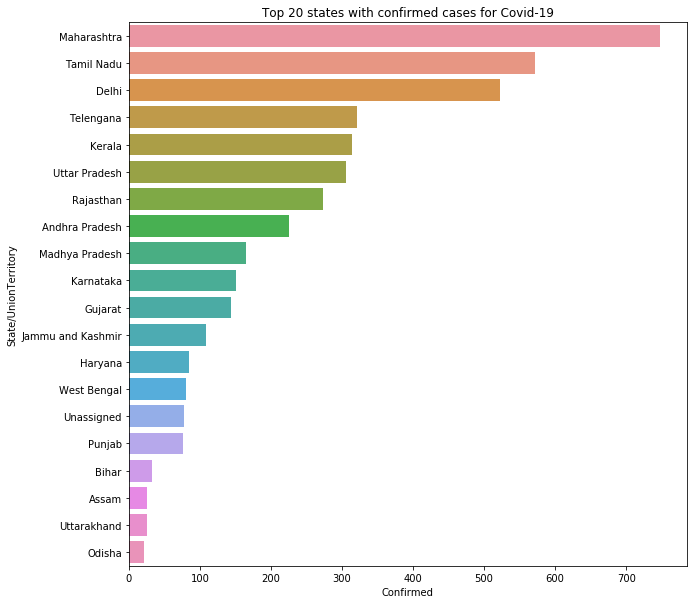

In [75]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Confirmed', y='State/UnionTerritory', data=casesByState[:20] )

plt.title('Top 20 states with confirmed cases for Covid-19')

In [87]:
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import numpy as np

In [78]:
# Data Preparation
# We will start numbering the days from 31st Jan as that is the first entry in our data
df = pd.DataFrame(columns=['t','y'])
df['t'] = casesByDay.index+1
df['y'] = casesByDay.Confirmed
df.head()

,t,y
0,1,1
1,2,1
2,3,2
3,4,3
4,5,3


In [79]:
df.tail()

,t,y
63,64,2069
64,65,2547
65,66,3072
66,67,3577
67,68,4281


In [122]:
x = list(df.t)
y = list(df.y)
def exponential_model(x,a,r):
    return a*np.exp(r*(x))
popt, pcov = curve_fit(exponential_model,x,y)
pcov

array([[ 4.03600471e-24, -1.99337724e-19],
       [-1.99337724e-19,  9.84565025e-15]])

In [127]:
yList = list( map(lambda x: exponential_model(x, *exp_fit[0]), x))

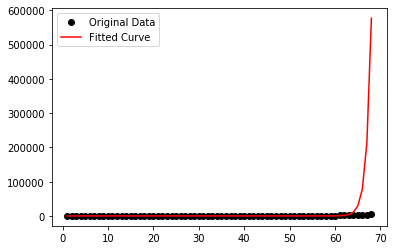

In [128]:

plt.figure()
plt.plot(x, y, 'ko', label="Original Data")
plt.plot(x, yList, 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [126]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))
exp_fit = curve_fit(exponential_model,list(df.t),list(df.y),method='dogbox')
exp_fit

(array([7.96868159e-24, 9.99999997e-01, 1.54828356e+00]),
 array([[ 9.58934145e-49,  0.00000000e+00, -0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00]]))

In [130]:
# function to be minimized
def f_sigmoid(x, a, b, c):
    # a = sigmoid midpoint
    # b = curve steepness (logistic growth)
    # c = max value
    return (c / (1 + np.exp(-b*(x-a))))

In [197]:
 # fitting the data on the logistic function
inception=1
x = df.t
y = df.y
popt, pcov = curve_fit(f_sigmoid, x, y, method='dogbox', bounds=([0., 0.001, 100],[500., 7.5, 1339000000]), p0=[0.1,0.1,1000])
print(popt)
# peakday = datetime.strftime(datetime.strptime(country_graph["date"][inception], "%m/%d/%Y")+timedelta(days=int(popt_sig[0])), "%m/%d/%Y")
# plt.figure(figsize=(16,8))

# x_m = np.arange(len(y)+future_days)
# y_m = f_sigmoid(x_m, *popt_sig)

[5.00000000e+02 4.98330044e-03 4.66568067e+03]


In [193]:
yList = list( map(lambda x: f_sigmoid(x, *popt), x))

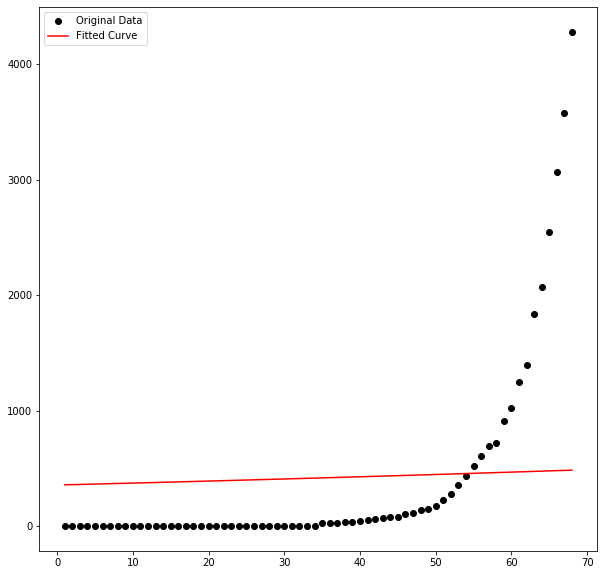

In [194]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, 'ko', label="Original Data")
plt.plot(x, yList, 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [202]:
def logistic(x,a,b,c):
    return (c/(1+a*np.exp(-b*x)))

In [225]:
p0 = [1000,0.1,4000]
p0

[1000, 0.1, 4000]

In [226]:
bounds = ([1000,0.1,4000],[1000000.,5.,1339000000])

In [227]:
popt, pcov = curve_fit(logistic, x, y, method='dogbox', bounds=bounds, p0=p0)
print(popt)

[1.00000000e+06 1.06254408e-01 2.48878857e+06]


In [228]:
yList = list( map(lambda x: logistic(x, *popt), x))

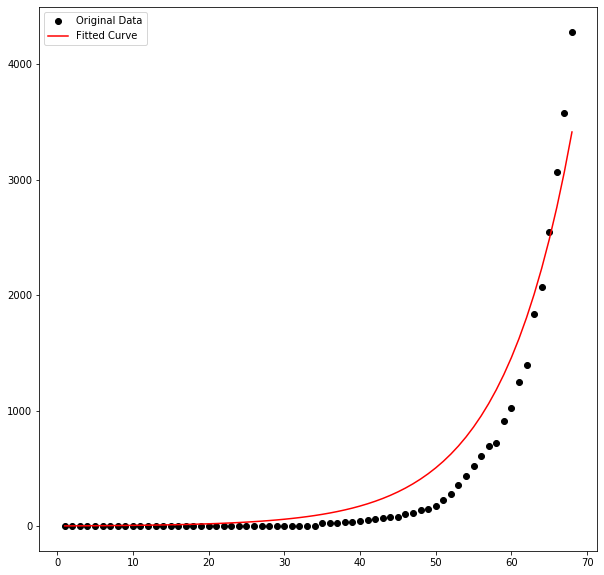

In [229]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, 'ko', label="Original Data")
plt.plot(x, yList, 'r-', label="Fitted Curve")
plt.legend()
plt.show()